#### Ensemble 학습
- 보팅(Voting)   : 같은 데이터 세트를 이용하고 서로 다른 분류 알고리즘을 활용해서 최종 예측
- 배깅(Bagging)  : 데이터 샘플링을 통해서 서브세트를 만들고 같은 분류 알고리즘을 활용해서 최종 예측
- 
- 보팅 유형 : 하드 보팅(다수결) vs 소트프 보팅(확률)
- 배깅 유형 : 랜덤 포레스트(DecisionTreeClassifier) -> 확률

In [1]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SVM add
from sklearn.svm          import SVC

# Knn add
from sklearn.neighbors    import KNeighborsClassifier

# ensemble add
from sklearn.ensemble     import VotingClassifier
from sklearn.ensemble     import RandomForestClassifier



from sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler , Binarizer 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve , roc_curve

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# datasets
from sklearn.datasets import load_breast_cancer 


#### Voting Classifier

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancerDF = pd.DataFrame(cancer.data , 
                        columns = cancer.feature_names)
cancerDF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from IPython.display import Image
Image('c:/img/ensemble-01.png', width = 700)

FileNotFoundError: No such file or directory: 'c:/img/ensemble-01.png'

FileNotFoundError: No such file or directory: 'c:/img/ensemble-01.png'

<IPython.core.display.Image object>

In [5]:
Image('c:/img/ensemble-02.png', width = 700)

FileNotFoundError: No such file or directory: 'c:/img/ensemble-02.png'

FileNotFoundError: No such file or directory: 'c:/img/ensemble-02.png'

<IPython.core.display.Image object>

In [6]:
# 소프트 보팅
# 앙상블 구현을 위해서 분류 모델 선정(tree , logistic , knn , svm )
# 앙상블 모델을 만들고
# 데이터 세트 분리

# 보팅을 통해서 학습/예측/평가
# 최종적으로 시각화를 진행

# [실습]

#### Voting 연습

In [7]:
from sklearn.datasets import load_digits

In [8]:
mnist = load_digits()
# mnist.keys()
features , labels = mnist.data , mnist.target

In [9]:
features.shape

(1797, 64)

In [10]:
labels.shape

(1797,)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(features , labels , test_size=0.2 , random_state=100)

In [12]:
# AUC 성능평가 확인

def metrics_evaluation(y_test, y_pred=None , y_pred_proba=None) :
    print("정확도 : {} , 정밀도 : {} , 재현율 : {} , 조화평균(F1) : {} , AUC : {} "
          .format(accuracy_score(y_test, y_pred) , 
                  precision_score(y_test, y_pred) , 
                  recall_score(y_test, y_pred) , 
                  f1_score(y_test, y_pred) , 
                  roc_auc_score(y_test, y_pred_proba) ) )

In [13]:
dt = DecisionTreeClassifier(criterion='entropy' , 
                            max_depth = 8 , 
                            max_features=32 , 
                            random_state=35 ) 
dt.fit(X_train , y_train)
dt_pred = dt.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 299) 
knn.fit(X_train , y_train)
knn_pred = knn.predict(X_test)


svm = SVC(probability=True) 
svm.fit(X_train , y_train)
svm_pred = svm.predict(X_test)



In [14]:
# print('target : ' , y_test)
# print('prediction : ' , dt_pred)
print('tree : ' , accuracy_score(y_test , dt_pred))
print('knn : '  , accuracy_score(y_test ,  knn_pred))
print('svm : ' , accuracy_score(y_test , svm_pred))

tree :  0.8694444444444445
knn :  0.8555555555555555
svm :  0.9916666666666667


In [15]:
voting_clf = VotingClassifier(estimators = [ ('tree' , dt) , ('knn' , knn) , ('svm' , svm) ]  , 
                              weights = [1,1,1] , 
                              voting  = 'hard')
voting_clf.fit(X_train , y_train)
hard_voting_pred = voting_clf.predict(X_test)
print('hard voting : ' , accuracy_score(y_test , hard_voting_pred))

hard voting :  0.9611111111111111


In [16]:
voting_clf = VotingClassifier(estimators = [ ('tree' , dt) , ('knn' , knn) , ('svm' , svm) ]  , 
                              weights = [1,1,1] , 
                              voting  = 'soft')
voting_clf.fit(X_train , y_train)
soft_voting_pred = voting_clf.predict(X_test)
print('sotf voting : ' , accuracy_score(y_test , soft_voting_pred ))

sotf voting :  0.9388888888888889


#### Visualization

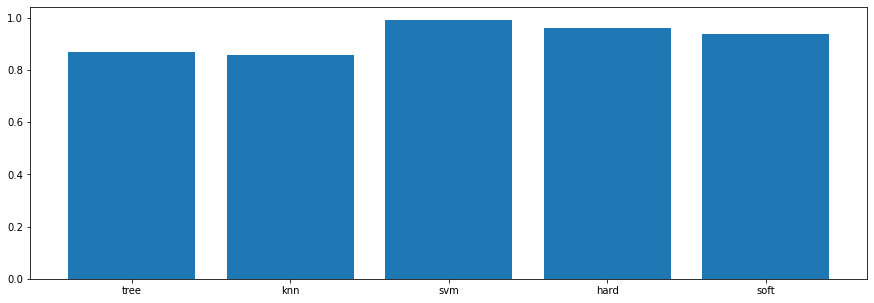

In [17]:
plt.figure(figsize=(15, 5))

x = np.arange(5)

plt.bar(x , height = [ accuracy_score(y_test , dt_pred)   ,
                       accuracy_score(y_test ,  knn_pred) , 
                       accuracy_score(y_test ,  svm_pred) ,
                       accuracy_score(y_test , hard_voting_pred) , 
                       accuracy_score(y_test , soft_voting_pred)])

plt.xticks(x , ['tree' , 'knn' , 'svm' , 'hard' , 'soft'])
plt.show()
plt.close()

#### bagging - Random Forest(DecisionTree)

- bagging 연습

- 1. load mnist dataset

In [18]:
mnist = load_digits()
# mnist.keys()
features , labels = mnist.data , mnist.target

- 2. Cross Validation

In [19]:
def user_cross_validation(classifier , features , labels) :
    cv_scores = []
    
    for i in range(10) :
        scores = cross_val_score(classifier , features , labels , cv=10 , scoring='accuracy')
        cv_scores.append( scores.mean() ) 
    
    return cv_scores 

In [20]:
dt_cv_scores = user_cross_validation(DecisionTreeClassifier() , features , labels)
rt_cv_scores = user_cross_validation(RandomForestClassifier() , features , labels)

In [21]:
dt_cv_scores
np.mean(dt_cv_scores)

0.82764121663563

In [22]:
rt_cv_scores
np.mean(rt_cv_scores)

0.9472936064556177

- Decision Tree vs Random Forest Visualization

In [23]:
cv_list = [
    ['decision' , dt_cv_scores],
    ['random forest' , rt_cv_scores]
]

In [24]:
visualDF = pd.DataFrame.from_dict(dict(cv_list))
visualDF

,decision,random forest
0,0.816335,0.948240
1,0.830273,0.944910
2,0.828572,0.946570
3,0.824659,0.949342
4,0.829711,0.942114
5,0.836940,0.945469
6,0.825810,0.947132
7,0.822455,0.949904
8,0.830279,0.948786
9,0.831378,0.950469


<AxesSubplot:>

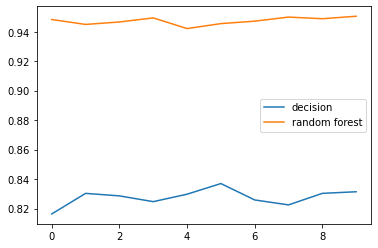

In [25]:
visualDF.plot()

In [26]:
pd.__version__

'1.1.3'

#### Voting  & Bagging 실전


In [27]:
# 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
# features.txt
# sep='\s+'

features = pd.read_csv('./data/human_activity/features.txt',
                        sep='\s+',
                        header=None, 
                        names=['column_name'])
features

,column_name
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


In [28]:
X_train = pd.read_csv('./data/human_activity/Train/X_train.txt', sep='\s+', header=None)
X_train.columns = features.loc[ : , 'column_name']
X_train

column_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [45]:
X_test = pd.read_csv('./data/human_activity/Test/X_test.txt', sep='\s+')
X_test.columns = features.loc[ : , 'column_name']
X_test

column_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
1,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
2,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
3,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
4,0.039803,-0.004316,-0.022932,-0.994558,-0.979556,-0.974890,-0.994480,-0.979701,-0.978969,-0.797702,...,0.133895,-0.504415,-0.856842,-0.095681,0.048849,0.760684,-0.072216,-0.690425,0.294875,-0.061498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3157,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3158,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3159,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [46]:
# 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 target으로 부여
y_train = pd.read_csv('./data/human_activity/Train/y_train.txt', sep='\s+', names=['target'])
y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


In [47]:
y_test = pd.read_csv('./data/human_activity/Test/y_test.txt', sep='\s+', names=['target'])
y_test

,target
0,5
1,5
2,5
3,5
4,5
...,...
3157,2
3158,2
3159,2
3160,2


In [48]:
print('## 학습 피처 데이터셋 info()')
X_train.info()

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 561 entries, tBodyAcc-Mean-1 to tZAxisAcc-AngleWRTGravity-1
dtypes: float64(561)
memory usage: 33.2 MB


In [49]:
# target 분포
y_train['target'].value_counts()

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: target, dtype: int64

In [50]:
# 결측값 확인
X_train.isna().sum().sum()

0

In [51]:
tree_model = DecisionTreeClassifier(random_state = 100)
tree_model.fit(X_train , y_train)
y_pred = tree_model.predict(X_test)

acc = accuracy_score(y_test , y_pred)
print('결정트리 분류 정확도 : ' , acc)
print('결정트리 하이퍼 파라미터  : ' , tree_model.get_params() ) 

ValueError: Found input variables with inconsistent numbers of samples: [3162, 3161]

In [ ]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(tree_model , param_grid = params , scoring='accuracy' , cv=5 , verbose = 1)
grid_cv.fit(X_train , y_train)
print('GS CV 베스트 스코어 : ' , grid_cv.best_score_ )
print('최적의 하이퍼 파라미터  : ' , grid_cv.best_params_ ) 

In [158]:
grid_cv_df = pd.DataFrame(grid_cv.cv_results_)
grid_cv_df[['param_max_depth' , 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.821426
1,8,0.842030
2,10,0.843314
3,12,0.840353
4,16,0.836362
5,20,0.840354
6,24,0.840354


In [137]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9108


In [140]:
params = {
    'n_estimators':[10],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )

grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8861


In [143]:
# 튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가
rf_clf1 = RandomForestClassifier(n_estimators=10, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=10, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8918


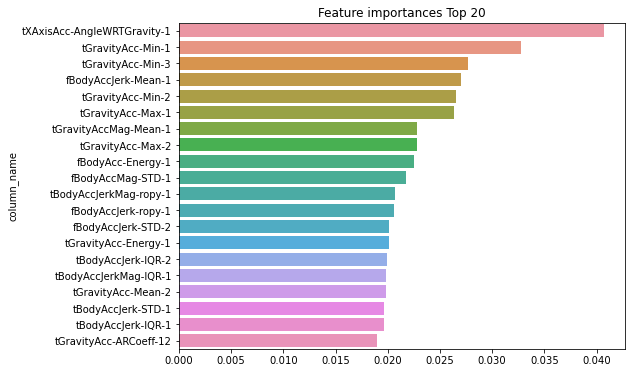

In [144]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))

sns.barplot(x=ftr_top20 , y = ftr_top20.index)

plt.title('Feature importances Top 20')

plt.show()
plt.close()

In [94]:
# 중복 데이터 확인
# featureDF[featureDF.duplicated()]
# cumcount() 몇번째 중복된 데이터인지 확인
# featureDF.groupby('column_name').cumcount()



,column_name
23,tBodyAcc-ropy-1
24,tBodyAcc-ropy-1
63,tGravityAcc-ropy-1
64,tGravityAcc-ropy-1
103,tBodyAccJerk-ropy-1
104,tBodyAccJerk-ropy-1
143,tBodyGyro-ropy-1
144,tBodyGyro-ropy-1
183,tBodyGyroJerk-ropy-1
184,tBodyGyroJerk-ropy-1
